In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
encoding = 'latin1'
cards_cleaned = pd.read_csv('cards_cleaned.csv', encoding=encoding)

In [20]:
cards_cleaned.head(5)

,card_id,playerClass,type,name,set,text,mana cost,attack,health,rarity,collectible,flavor,sentiment
0,AT_132,NEUTRAL,MINION,Justicar Trueheart,TGT,<b>Battlecry:</b> Replace your starting Hero P...,6,6,3,LEGENDARY,True,It's like putting racing stripes and a giant s...,very positive
1,AT_131,NEUTRAL,MINION,Eydis Darkbane,TGT,Whenever <b>you</b> target this minion with a ...,3,3,4,LEGENDARY,True,"HATES being called ""the wonder twins"".",very negative
2,EX1_583,NEUTRAL,MINION,Priestess of Elune,EXPERT1,<b>Battlecry:</b> Restore 4 Health to your hero.,6,5,4,COMMON,True,"If she threatens to ""moon"" you, it's not what ...",negative
3,CFM_095,NEUTRAL,MINION,Weasel Tunneler,GANGS,<b>Deathrattle:</b> Shuffle this minion into y...,1,1,1,EPIC,True,He's the reason the First Bank of Gadgetzan ha...,positive
4,BRM_018,PALADIN,MINION,Dragon Consort,BRM,<b>Battlecry:</b> The next Dragon you play cos...,5,5,5,RARE,True,Everybody wants someone to snuggle with. Even ...,very negative


sentimental analysis.
BERT (Bidirectional Encoder Representations from Transformers), which is a transformer-based model.

In [21]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer, pipeline

In [22]:
# specify model
model_name = 'nlptown/bert-base-multilingual-uncased-sentiment'
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

In [23]:
# Create a sentiment analysis pipeline using the loaded tokenizer and model
sentiment_analysis_pipeline = pipeline('sentiment-analysis', model=model, tokenizer=tokenizer)

In [24]:
sentiments = []

for flavor_text in cards_cleaned['flavor']:
    if pd.notna(flavor_text):
        result = sentiment_analysis_pipeline(flavor_text)
        sentiments.append(result[0]['label'])

In [25]:
# Replace the following line:
#cards_cleaned['sentiment'] = sentiments

# With the following line:
cards_cleaned.loc[cards_cleaned['flavor'].notna(), 'sentiment'] = sentiments

In [26]:
cards_cleaned.head(5)

,card_id,playerClass,type,name,set,text,mana cost,attack,health,rarity,collectible,flavor,sentiment
0,AT_132,NEUTRAL,MINION,Justicar Trueheart,TGT,<b>Battlecry:</b> Replace your starting Hero P...,6,6,3,LEGENDARY,True,It's like putting racing stripes and a giant s...,5 stars
1,AT_131,NEUTRAL,MINION,Eydis Darkbane,TGT,Whenever <b>you</b> target this minion with a ...,3,3,4,LEGENDARY,True,"HATES being called ""the wonder twins"".",1 star
2,EX1_583,NEUTRAL,MINION,Priestess of Elune,EXPERT1,<b>Battlecry:</b> Restore 4 Health to your hero.,6,5,4,COMMON,True,"If she threatens to ""moon"" you, it's not what ...",2 stars
3,CFM_095,NEUTRAL,MINION,Weasel Tunneler,GANGS,<b>Deathrattle:</b> Shuffle this minion into y...,1,1,1,EPIC,True,He's the reason the First Bank of Gadgetzan ha...,4 stars
4,BRM_018,PALADIN,MINION,Dragon Consort,BRM,<b>Battlecry:</b> The next Dragon you play cos...,5,5,5,RARE,True,Everybody wants someone to snuggle with. Even ...,1 star


In [27]:
cards_cleaned['sentiment'].unique()

array(['5 stars', '1 star', '2 stars', '4 stars', '3 stars'], dtype=object)

In [28]:
# mapping
sentiment_mapping = {
    '1 star': 'very negative',
    '2 stars': 'negative',
    '3 stars': 'neutral',
    '4 stars': 'positive',
    '5 stars': 'very positive'
}

In [29]:
cards_cleaned['sentiment'] = cards_cleaned['sentiment'].map(sentiment_mapping)

In [30]:
cards_cleaned.head(5)

,card_id,playerClass,type,name,set,text,mana cost,attack,health,rarity,collectible,flavor,sentiment
0,AT_132,NEUTRAL,MINION,Justicar Trueheart,TGT,<b>Battlecry:</b> Replace your starting Hero P...,6,6,3,LEGENDARY,True,It's like putting racing stripes and a giant s...,very positive
1,AT_131,NEUTRAL,MINION,Eydis Darkbane,TGT,Whenever <b>you</b> target this minion with a ...,3,3,4,LEGENDARY,True,"HATES being called ""the wonder twins"".",very negative
2,EX1_583,NEUTRAL,MINION,Priestess of Elune,EXPERT1,<b>Battlecry:</b> Restore 4 Health to your hero.,6,5,4,COMMON,True,"If she threatens to ""moon"" you, it's not what ...",negative
3,CFM_095,NEUTRAL,MINION,Weasel Tunneler,GANGS,<b>Deathrattle:</b> Shuffle this minion into y...,1,1,1,EPIC,True,He's the reason the First Bank of Gadgetzan ha...,positive
4,BRM_018,PALADIN,MINION,Dragon Consort,BRM,<b>Battlecry:</b> The next Dragon you play cos...,5,5,5,RARE,True,Everybody wants someone to snuggle with. Even ...,very negative


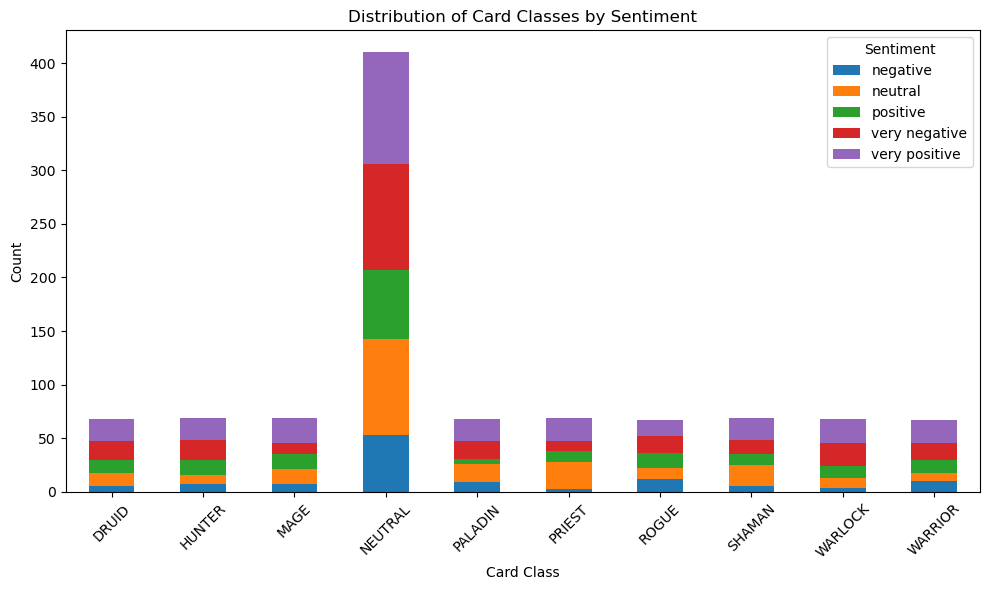

In [36]:
# Group by playerClass and sentiment, and count the number of occurrences
class_sentiment_counts = cards_cleaned.groupby(['playerClass', 'sentiment']).size().unstack(fill_value=0)

# Plotting
ax = class_sentiment_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Distribution of Card Classes by Sentiment')
plt.xlabel('Card Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()

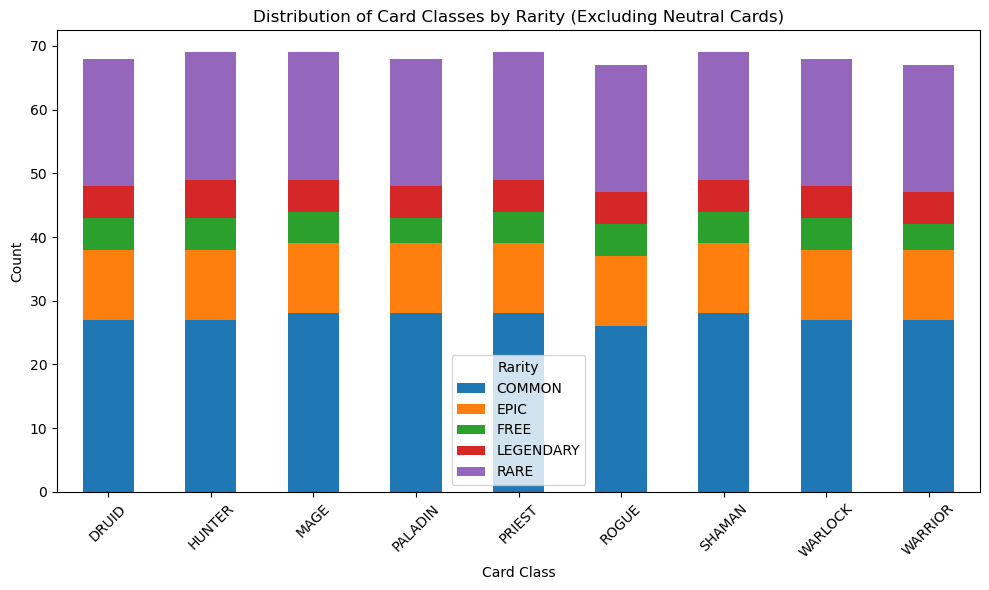

In [34]:
# Filter out neutral cards
cards_cleaned_filtered = cards_cleaned[cards_cleaned['playerClass'] != 'NEUTRAL']

# Group by playerClass and rarity, and count the number of occurrences
class_rarity_counts = cards_cleaned_filtered.groupby(['playerClass', 'rarity']).size().unstack(fill_value=0)

# Check if there are no neutral cards left in the data
if 'NEUTRAL' in class_rarity_counts.index:
    class_rarity_counts.drop('NEUTRAL', inplace=True)

# Plotting
class_rarity_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Distribution of Card Classes by Rarity (Excluding Neutral Cards)')
plt.xlabel('Card Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Rarity')
plt.tight_layout()
plt.show()

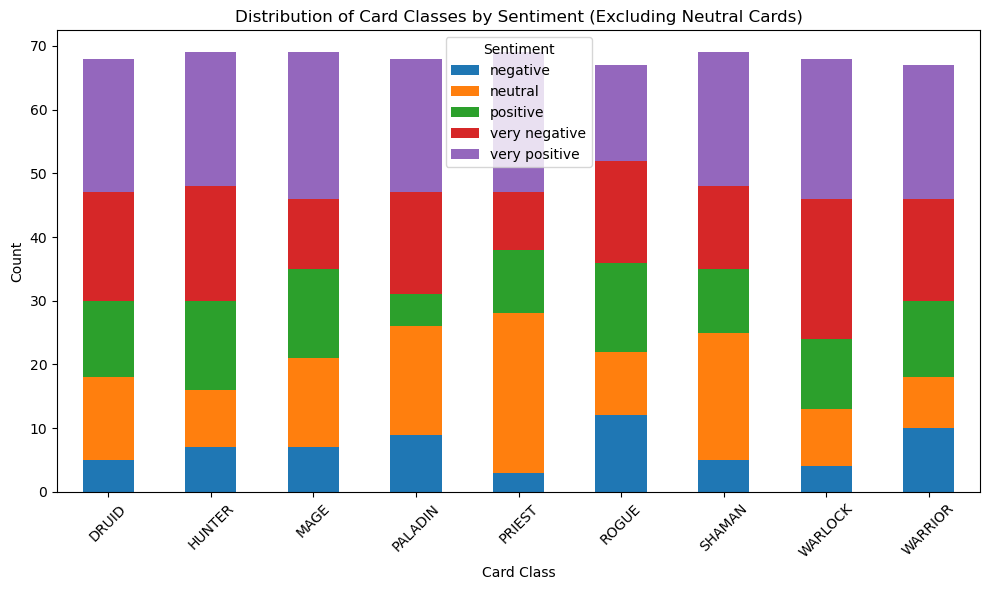

In [35]:
# Filter out neutral cards
cards_cleaned_filtered = cards_cleaned[cards_cleaned['playerClass'] != 'NEUTRAL']

# Group by playerClass and sentiment, and count the number of occurrences
class_sentiment_counts = cards_cleaned_filtered.groupby(['playerClass', 'sentiment']).size().unstack(fill_value=0)

# Check if there are no neutral cards left in the data
if 'NEUTRAL' in class_sentiment_counts.index:
    class_sentiment_counts.drop('NEUTRAL', inplace=True)

# Plotting
class_sentiment_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Distribution of Card Classes by Sentiment (Excluding Neutral Cards)')
plt.xlabel('Card Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()